# Diamond fitting
This Notebook will give a basic introduction to peak fitting using the Diamond fitting scripts.
Some example peak files can be found in the exaxmple files folder and will be used here to demonstrate the varius functions of the scripts.

#### Import packages

Here we import the fitting functions from the diamond_functions file.

In [1]:
%matplotlib inline

import diamond_functions
from diamond_functions import PeakParams

## Analyse a single image file

We start by analysing a single file which contains a single spectrum.

First we define the path to the file to be analysed:

In [2]:
file_path = 'example_data/adc_041_7Nb_NDload_700C_15mms_00001.dat'

To do fitting, the data must be loaded into a `FitPeak` instance. In this case we are fitting a singlet peak and so we use the `FitSingletPeak` object.

Note that in DAWN, the right hand side of the diffraction image is defined as 0 degrees and this number increases clockwise. This means that, column 1 is the right hand cake at -5 to 5 deg if using 10 deg slices i.e. in DAWN (-5,355).
Column 0 is the two-theta data in the file.

In [3]:
spectral_data = diamond_functions.FitPeak(file_path, cake=1)

The data from the file has been loaded into the FitCake object. We can then use the `plot_spectrum` method to plot the entire spectrum:

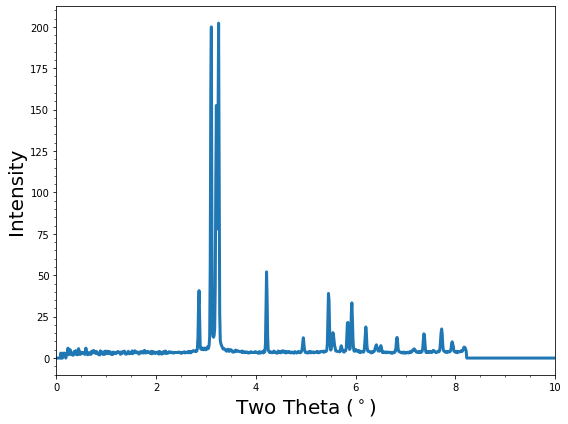

In [4]:
spectral_data.plot_spectrum()

If you are using the matplotlib notebook interactive backend then it should be possible to zoom and pan the graph directly.
If you are using a non-interactive backend then you can specify the x-axis limits by passing these to the `plot_spectrum` 
method.

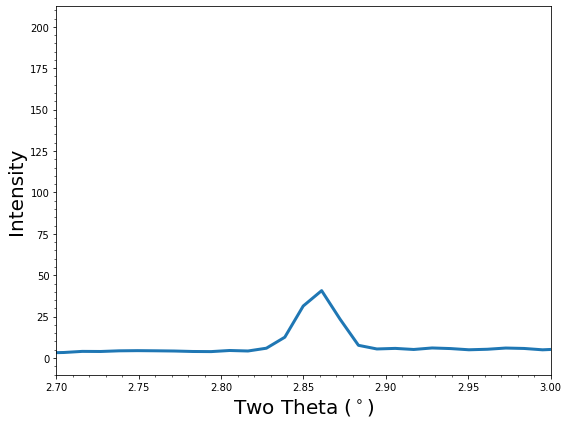

In [5]:
spectral_data.plot_spectrum(2.7, 3)

### Fitting a single peak

To begin a fit, we need to define the peak bounds and labels. The peak bounds specify where the peak is in the spectrum. 

We also need to specify some fitting parameters using a `PeakParams` object. We must provide a list of peak params, one for each peak we are fitting. In this case we are fitting only a single singlet peak which means we only need a single list containing a single `PeakParams` object. 

For single peaks we normally don't need to specify the fitting parameters - the algorithm can fit the peaks on its own using default values. To use default peak fitting parameters we can initialise PeakParams with no arguments.

In [6]:
peak_bounds = [(2.8, 2.9)]
peak_labels = ['(10-10)']
peak_params = [[PeakParams()]]

The method `fit_peaks` fits the specified peaks.

In [7]:
spectral_data.fit_peaks(peak_labels, peak_bounds, peak_params)

The results of the fit are stored in the `FitSingletPeak` object. The fit parameters can be viewed by specifying the name of the fitted peak.

In [8]:
spectral_data.fits_dict['(10-10)'].values

{'peak_1_amplitude': 1.0648217384015608,
 'peak_1_center': 2.858859789479215,
 'peak_1_sigma': 0.013478610452251013,
 'peak_1_fraction': 0.027782856828501346,
 'peak_1_fwhm': 0.026957220904502026,
 'peak_1_height': 36.775851273729636,
 'constBG': 4.59166065314623}

This is just a Python dictionary so individaul values can be subscripted as normal, for example the peak centre is:

In [9]:
spectral_data.fits_dict['(10-10)'].values['peak_1_center']

2.858859789479215

Full details on the fit can be seen by querying the dictionary object dirrectly.

In [10]:
spectral_data.fits_dict['(10-10)']

There is also a method for plotting the fit:

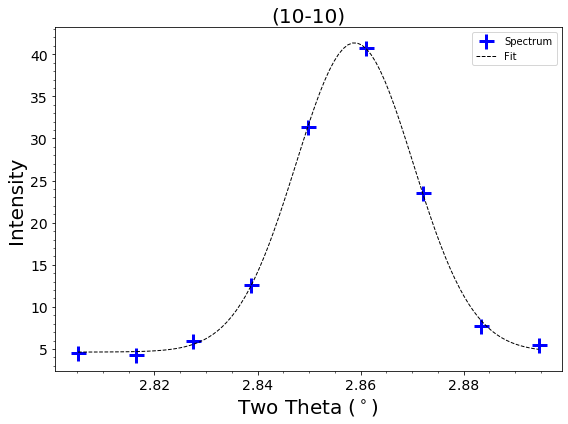

In [11]:
spectral_data.plot_fit('(10-10)')

### Fitting multiple peaks simultaneously

It can be more convinient to specify multiple peaks and fit them all at once. Here we try to fit the first 4 peaks at once. First get a good zoomed in view to see where the peaks are:

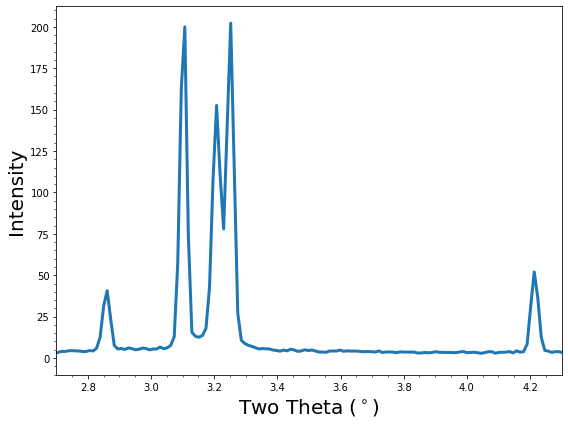

In [12]:
spectral_data.plot_spectrum(2.7, 4.3)

By providing multiple bounds we can fit multiple peaks simultanouesly.

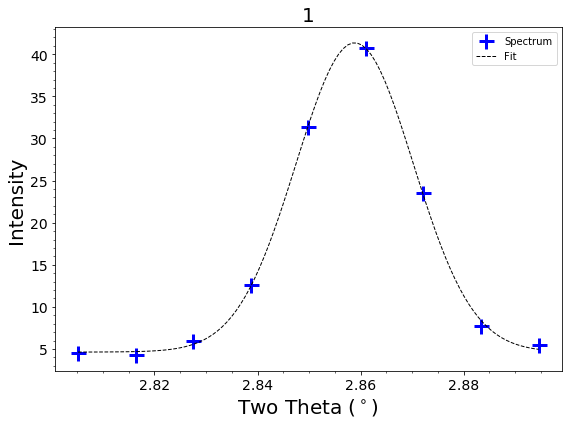

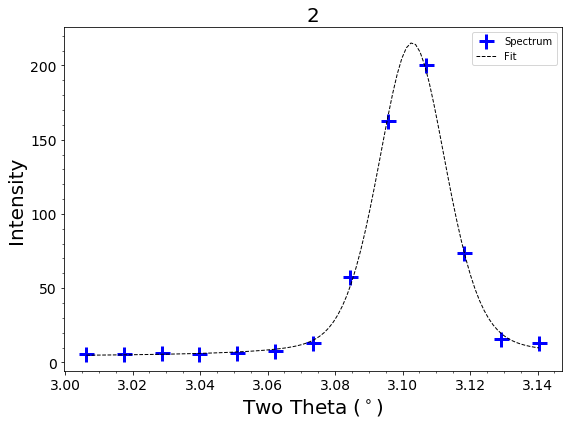

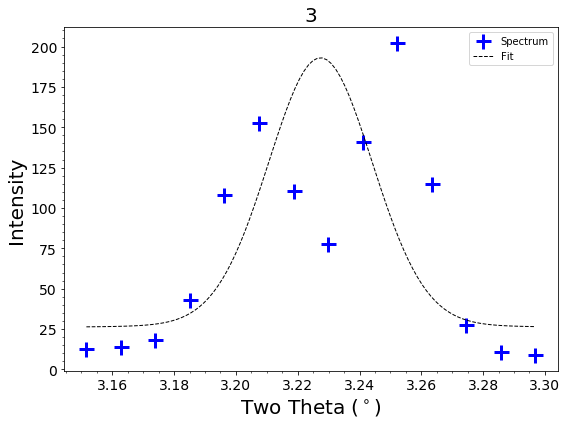

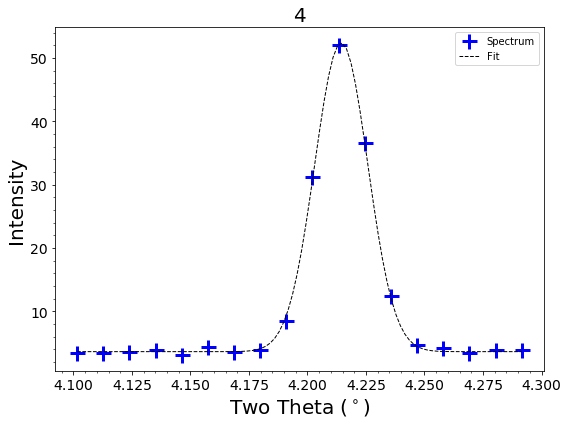

In [13]:
peak_bounds = [(2.8, 2.9), (3.0, 3.15), (3.15, 3.3), (4.1, 4.3)]
peak_labels = ['1', '2', '3', '4']
peak_params = [[PeakParams()], [PeakParams()], [PeakParams()], [PeakParams()]]
spectral_data.fit_peaks(peak_labels, peak_bounds, peak_params)

for label in peak_labels:
    spectral_data.plot_fit(label)

Note that the third peak is a double peak and is fitted very poorly. This is becuase unless we tell it, the fitting cannot guess that it is a doublet peak.

Fitting doublet peaks like the one in the range (3.15, 3.3) requires a little more information.

First lets zoom in to get a better view of the peak

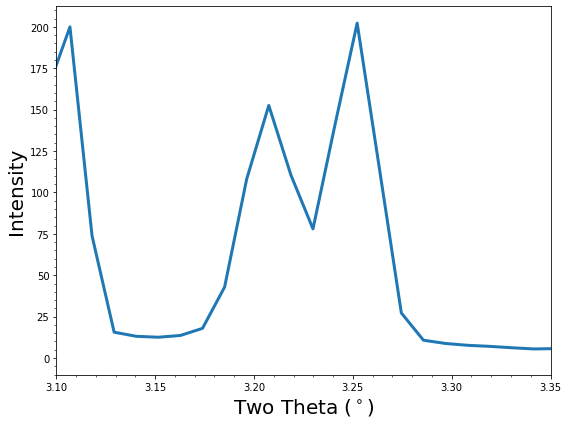

In [14]:
spectral_data.plot_spectrum(3.1, 3.35)

Unlike the singlet peak, the fitting algorithm now needs more information in order to separate the two peaks. 
We now need to provide some fitting parameters to the `PeakParams` object. This takes the parameters, *center*, *min* and *max* to describe the position of the peak. *center* is the approximate center point of the peak and *min* and *max* are upper and lower bounds for the center of the peak. The fitting algorithm will try a range of values between *min* and *max*.

We need to provide one set of peak params for each peak in the doublet. Remember that this must also be in a list. We have one list for each peak we are fitting and then in that list, one PeakParams for each element of the peak.

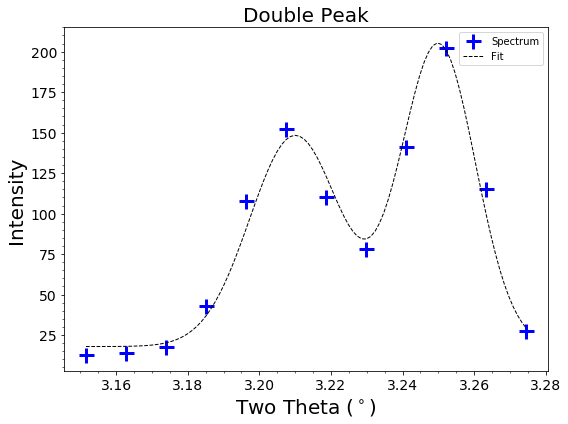

In [15]:
peak_labels = ['Double Peak']
peak_ranges = [(3.15, 3.28)]
peak_params = [[PeakParams(3.16, 3.21, 3.23), PeakParams(3.23, 3.25, 3.28)]]

spectral_data.fit_peaks(peak_labels, peak_ranges, peak_params)
spectral_data.plot_fit('Double Peak')

We can combine these seamlessly to fit the single and double peaks. Going back to the above example, we can fit the
first 4 peaks in the spectrum like this:

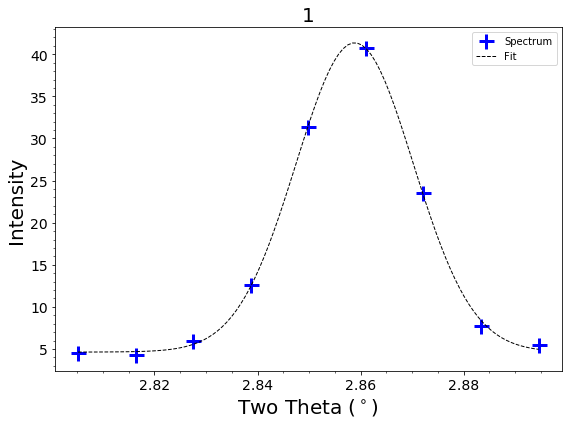

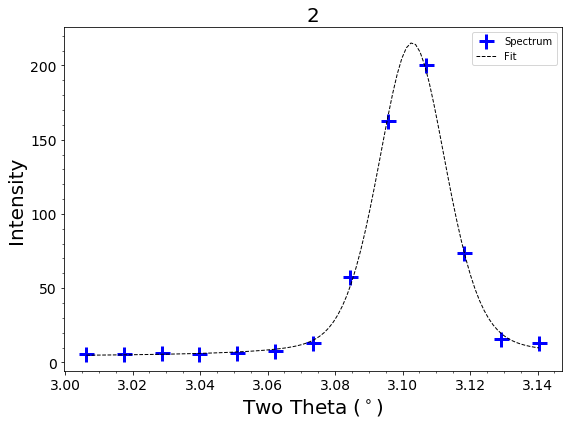

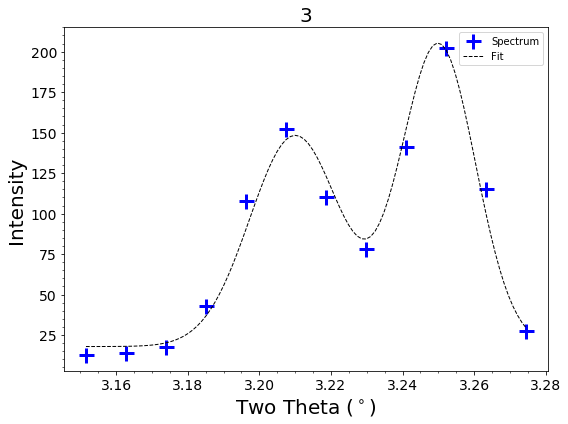

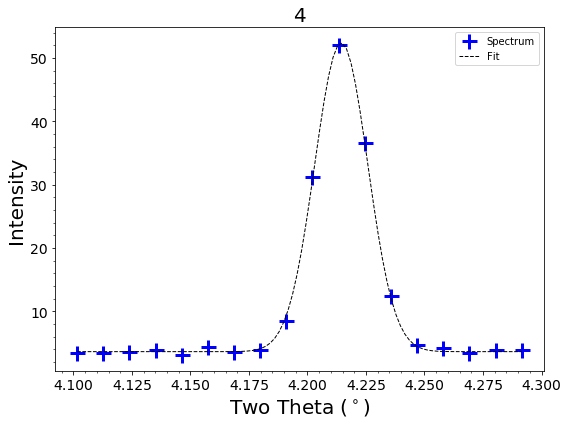

In [17]:
peak_bounds = [(2.8, 2.9), (3.0, 3.15), (3.15, 3.28), (4.1, 4.3)]
peak_labels = ['1', '2', '3', '4']
peak_params = [[PeakParams()], [PeakParams()], [PeakParams(3.16, 3.21, 3.23), PeakParams(3.23, 3.25, 3.28)], [PeakParams()]]
spectral_data.fit_peaks(peak_labels, peak_bounds, peak_params)

for label in peak_labels:
    spectral_data.plot_fit(label)

This now fits all of the peaks appropriately.